We are using illustrative classification problem here with SKLearn built in make_blobs function. We use two classifier; SKLearn KNeighborsClassifier and a Keras linear model. We plot the results, also we are using the very interesting mlextend extension for bias-variance decomposition. 

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.evaluate import bias_variance_decomp
from keras.models import Sequential
from keras.layers import Dense

In [257]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=3)
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

SKLearn KNeighbor classifier:

In [258]:
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
clf_score = clf.score(X_test, y_test)

Keras sequential model:

In [259]:
model = Sequential()
model.add(Dense(units=300, input_dim=2, activation='relu'))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X_train, OneHotEncoder().fit_transform(y_train[:, np.newaxis]), epochs=100, verbose=0)
model_pred = model.predict_classes(X_test)

c:\programdata\anaconda3\envs\ml-cpu-sk.0.21.2\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


score this Keras model manually:

In [260]:
cnt=0
for i in range(len(y_test)):
    if model_pred[i] == y_test[i]:
        cnt+=1
model_score=cnt/len(y_test)

plotting:

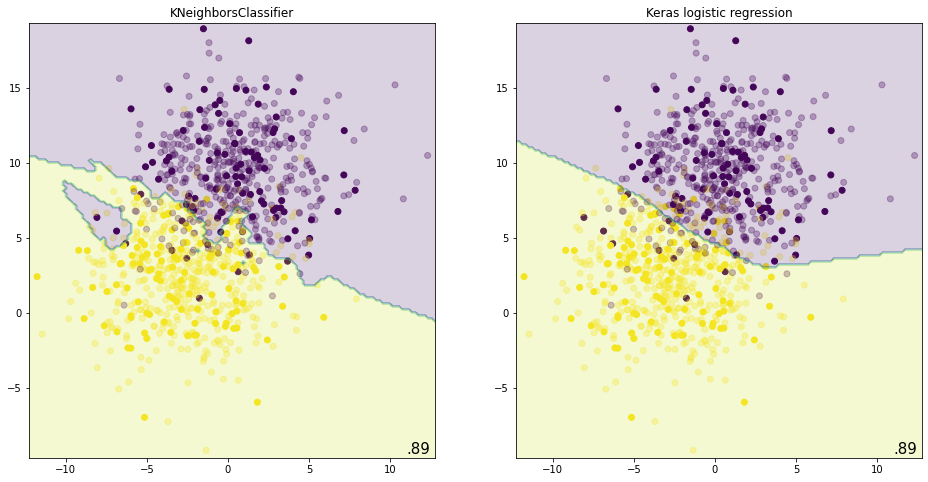

In [261]:
models = [['KNeighborsClassifier', clf], ['Keras logistic regression', model]]
models_scores = [clf_score, model_score]

figure = plt.figure(figsize=(16, 8))

for i, j in enumerate(models):
    ax = plt.subplot(1, 2, i+1)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.3)
    Z = np.argmax(j[1].predict_proba(np.c_[xx.ravel(), yy.ravel()]), -1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    ax.set_title(j[0])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.text(xx.max() - 0.3, yy.min() + 0.3, ('%.2f' % models_scores[i]).lstrip('0'), size=15, horizontalalignment='right')
    
plt.show()

Using mlextend bias variance decomposition for the KNeighborsClassifier:

In [262]:
mse, bias, var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
print('MSE:%.3f Bias:%.3f Variance:%.3f' % (mse, bias, var))

MSE:0.136 Bias:0.088 Variance:0.049
